In [13]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Load dataset
(x_train, y_train), (x_val, y_val) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# Preprocess data
x_train = x_train / 255.0
x_val = x_val / 255.0
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [5]:
# Create a simple neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [6]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=3,          # Number of epochs with no improvement before stopping
    min_delta=0.001,     # Minimum change to qualify as an improvement
    mode='min',          # Stop when the monitored quantity has stopped decreasing
    restore_best_weights=True,  # Restore the weights from the best epoch
    verbose=1            # Verbosity mode
)

In [8]:
# Train the model with early stopping
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=100,
    callbacks=[early_stopping]
)

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2622 - accuracy: 0.9252 - val_loss: 0.1393 - val_accuracy: 0.9588
Epoch 2/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1146 - accuracy: 0.9664 - val_loss: 0.0929 - val_accuracy: 0.9712
Epoch 3/100
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0767 - accuracy: 0.9772 - val_loss: 0.0829 - val_accuracy: 0.9746
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0582 - accuracy: 0.9823 - val_loss: 0.0863 - val_accuracy: 0.9723
Epoch 5/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0449 - accuracy: 0.9866 - val_loss: 0.0768 - val_accuracy: 0.9774
Epoch 6/100
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0355 - accuracy: 0.9891 - val_loss: 0.0902 - val_accuracy: 0.9744
Epoch 7/100
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0761 - val

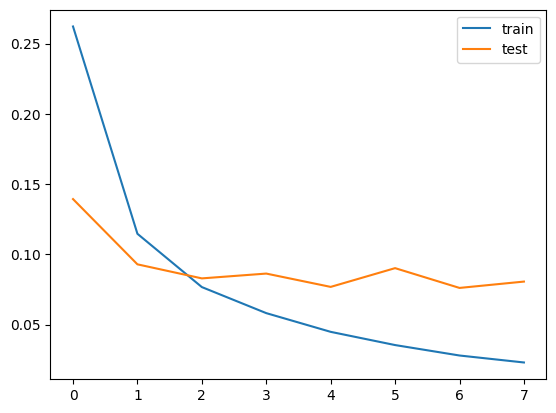

In [9]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()